## Homework 1
## Dive into Numpy Library


This assignment is aimed to refresh your knowledge in [numpy](https://numpy.org/doc/stable/) library

In [1]:
import numpy as np

## Main part: Quick Follow-up to Python Practice
Given the numpy array below, extract the requested data parts.


__Note:__ `Shift` + `Tab` when the cursor is inside the open parentheses allows to peek into the docks. Try to press `Tab` several times.

In [2]:
A = np.arange(120).reshape(10, -1)
A

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35],
       [ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71],
       [ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83],
       [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107],
       [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]])

1. Select all odd rows of A matrix. 
2. Build a one-dimentional array of all elements not divisible by 3 from all even rows of A.
3. Get sum of A diagonal elements.
4. Return every second diagonal element from A in reverse order.

1. Select all odd rows of A matrix.

In [3]:
A[1::2]

array([[ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23],
       [ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71],
       [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95],
       [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]])

2. Build a one-dimentional array of all elements not divisible by 3 from all even rows of A.

In [4]:
A[::2][A[::2] % 3 != 0]

array([  1,   2,   4,   5,   7,   8,  10,  11,  25,  26,  28,  29,  31,
        32,  34,  35,  49,  50,  52,  53,  55,  56,  58,  59,  73,  74,
        76,  77,  79,  80,  82,  83,  97,  98, 100, 101, 103, 104, 106,
       107])

3. Get sum of A diagonal elements.

In [5]:
A.diagonal().sum()

585

4. Return every second diagonal element from A in reverse order.

In [6]:
A.diagonal()[::-2]

array([117,  91,  65,  39,  13])

## Bonus track:
If you are familiar with everything above this line or it was too easy and you got ahead of the whole class, here is the bonus task:

![a](https://upload.wikimedia.org/wikipedia/commons/e/e5/Gospers_glider_gun.gif)

#### Bonus homework 1: The game of life (5 points)
Let's implement [Conway's Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using numpy matrix operations (using numpy operations is **obligatory** - homework written in pure python won't grant any bonus points :)).

If you don't want to read the Wikipedia page about it, here are the short game of life rules:

* There is 2d grid with cells. Every cell is eather *alive* (1) or *dead* (0).
* If a living cell has 2 or 3 neighboors it survives. Otherwise it dies (0, 1, 4 and more neighbours).
* If a dead cell has exactly 3 neigbours it becomes alive.


*Note:*

[colab](http://colab.research.google.com/) doesn't support `%matplotlib notebook` magic function, which is needed to draw animations (see discussions [here](https://github.com/googlecolab/colabtools/issues/616) and [here](https://github.com/googlecolab/colabtools/issues/706).)

Unfortunately, if you run this notebook on colab, you won't be able to see the results (you can try to run this code on your local machine though)

In [7]:
import matplotlib.pyplot as plt
from scipy.signal import convolve2d  # it can be useful
%matplotlib notebook

In [8]:
# Uncomment the next line to see convolve2d documentation
# ?convolve2d

In [9]:
def np_life_tick(cur_state: np.ndarray) -> np.ndarray:
    """
    :param cur_state: np.ndarray of shape [n, m] -> state at the current iteration
    :return: np.ndarray of shape [n, m] -> state at the (current + 1) iteration
    """
    kernel = np.array([
        [1, 1, 1],
        [1, 0, 1],
        [1, 1, 1]
    ])
    neighbours = convolve2d(cur_state, kernel, 'same')
    return np.where(np.logical_or(np.logical_and(np.logical_or(neighbours == 2,
                                                               neighbours == 3),
                                                 cur_state == 1),
                                  np.logical_and(neighbours == 3,
                                                 cur_state == 0)),
                    1, 0)

In [10]:
# some tests

assert np_life_tick(np.random.randint(0, 2, (10, 10))).shape == (10, 10), \
    "Shapes mismatch"
assert np.all(
    np_life_tick(
        np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])) == np.zeros((3, 3))
)
assert np.all(
    np_life_tick(np.array([[0, 0, 0], [1, 1, 1], [0, 0, 0]])) ==
    np.array([[0, 1, 0], [0, 1, 0], [0, 1, 0]])
)

Here is visualization code provided for you:

<IPython.core.display.Javascript object>


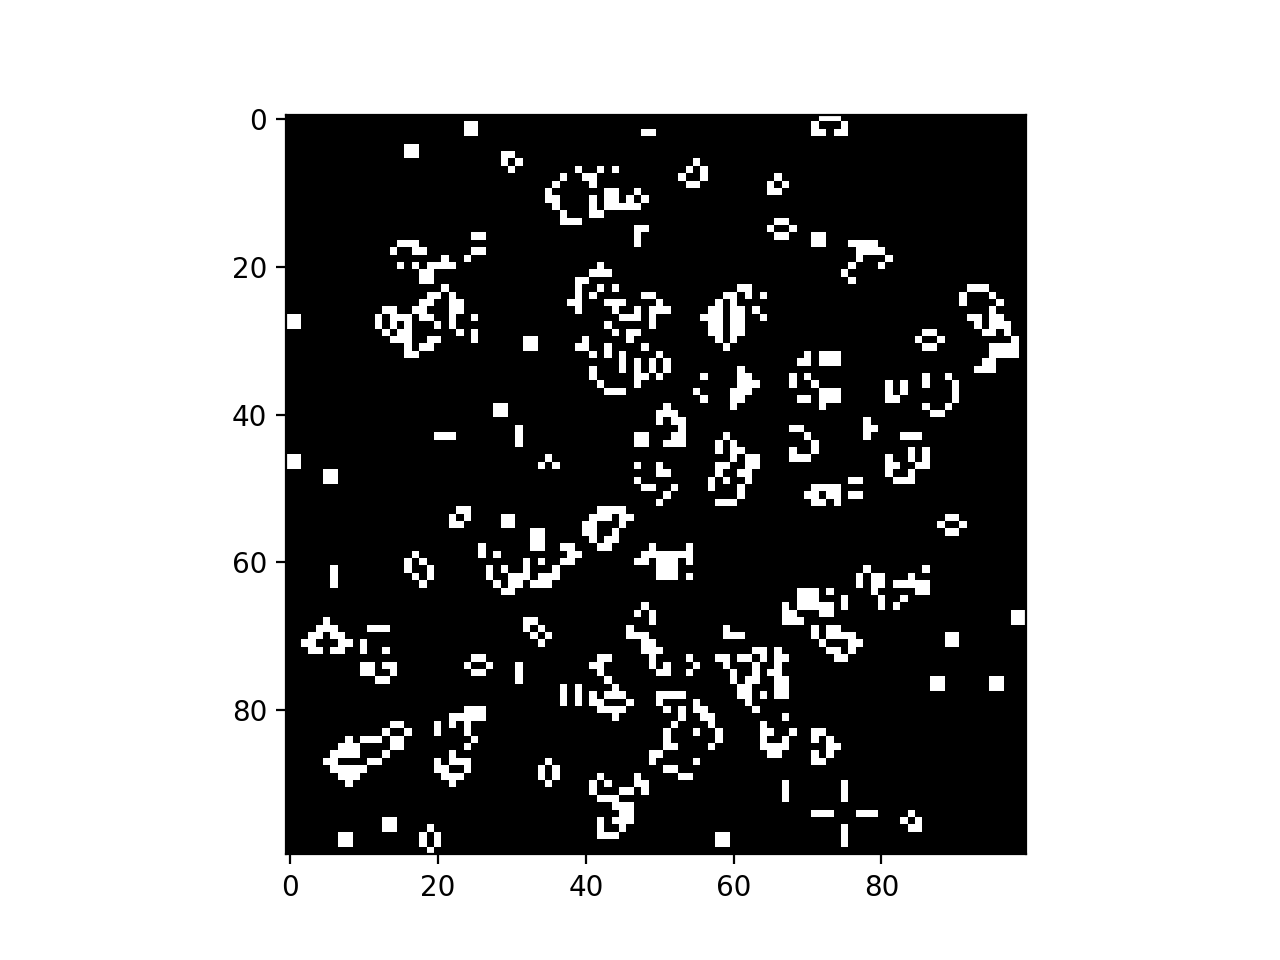

In [11]:
plt.ion()

# Start life
life_state = np.random.choice([0, 1], size=(100, 100))

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    # make a tick
    life_state = np_life_tick(life_state)

    # display the tick
    ax.clear()
    ax.imshow(life_state, cmap='gray')
    fig.canvas.draw()

And some beautiful initializations if you succeded:

<IPython.core.display.Javascript object>


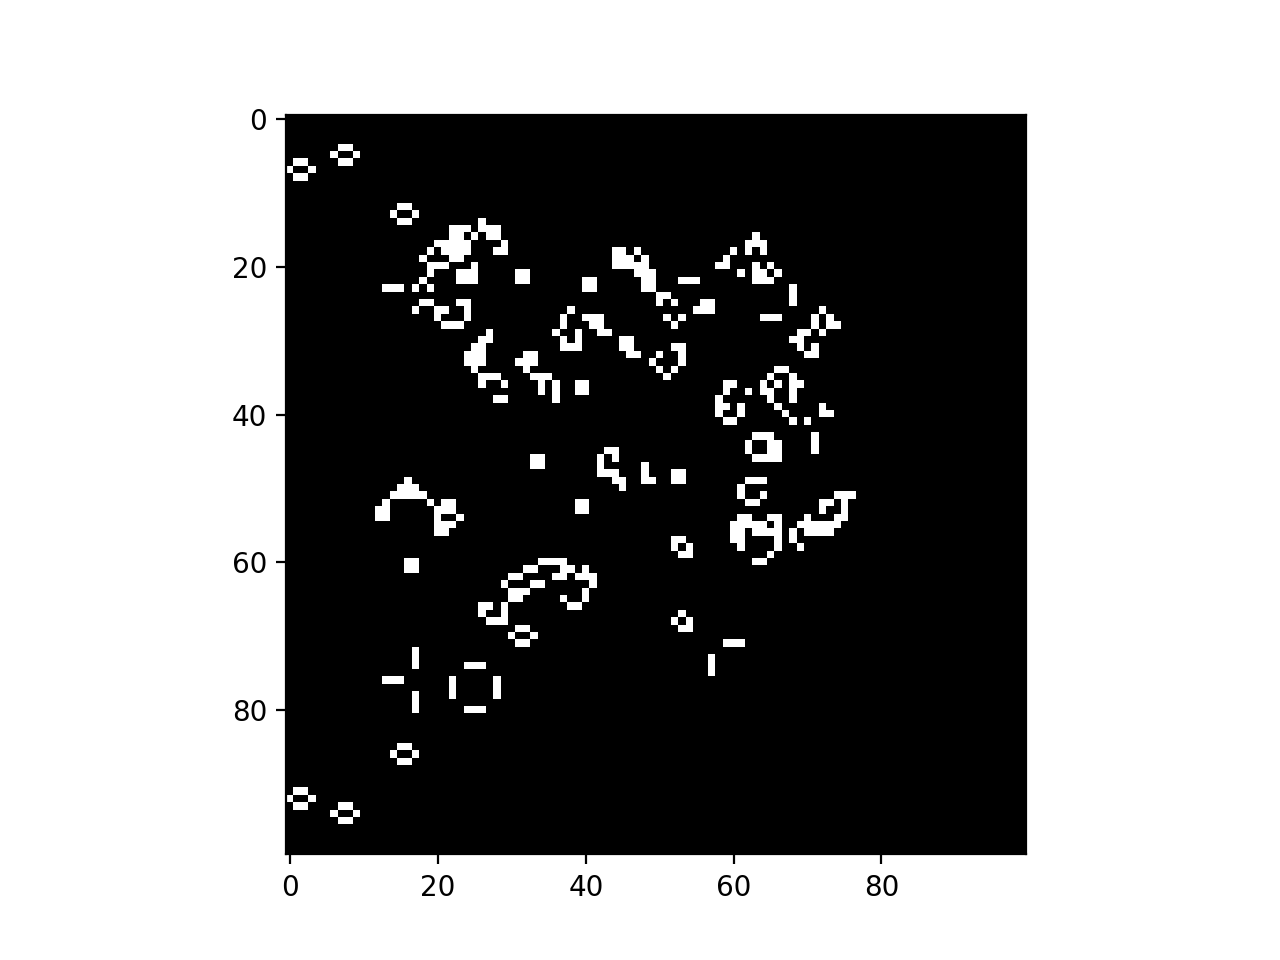

In [12]:
life_state = np.arange(100) % 2 + np.zeros([100, 100])

life_state[47:51, 49:51] = 1

fig = plt.figure()
ax = fig.add_subplot(111)
fig.show()

for _ in range(100):
    life_state = np_life_tick(life_state)
    ax.clear()
    ax.imshow(life_state, cmap='gray')
    fig.canvas.draw()

# test to ensure, function worked properly
assert life_state.sum() == 489, "Something went wrong..."

----